<font size="5">Copyright 2022 Edward Späth, Frankfurt University of Applied Sciences, FB2, Computer Science  
No liability or warranty; only for educational and non-commercial purposes     
See some basic hints for working with Jupyter notebooks in README.md</font>

<font size="6">Data Structure for storing Keys with their respective Priorities</font>

<font size="6">Data Structure Priority Queue</font>

In [1]:
class Node:  
    def __init__ (self, name, prio):
        self.Name = name
        self.Prio = prio

<font size="6">Storage for Elements of Priority Queue</font>

In [2]:
Elements = []
Heapsize = 0

<font size="6">Function to reset Priority Queue</font>

In [3]:
def ResetPQ ():
    global Elements, Heapsize
    Elements, Heapsize = [], 0

<font size="6">Helper Functions for easier access to Children/Parents of a given Element in Heap</font>

In [4]:
def parent (i):
    return (i-1)//2 # '//' means division with floor function (round down)

def left (i):
    return 2*i+1

def right (i):
    return 2*i+2

<font size="6">Implementation of a Priority Queue</font>

In [5]:
def Initialize (initialelements = []):
    for name, prio in initialelements:
        Insert_Key (name, prio)
        
def Insert_Key (name, prio):
        global Elements, Heapsize
        name_already_exists = False
        for el in Elements:
            if el.Name == name:
                name_already_exists = True
        if not name_already_exists:
            Elements.append (Node (name, float('inf'))) # float('inf') = positive infinity
            Heap_Decrease_Key (Heapsize, prio)
            Heapsize += 1   
        else:
            print ("\nThere is already an element named",name,"Please choose a different Name.")
            
def Heap_Decrease_Key (i, prio):
    global Elements 
    if prio >= Elements [i].Prio:
        print ("\nERROR: New priority must be smaller than old priority")
        return       
    Elements [i].Prio = prio   
    while i > 0 and Elements [parent (i)].Prio > Elements [i].Prio:
        Elements [i], Elements [parent (i)] = Elements [parent (i)], Elements [i]
        i = parent (i)
        
def Extract_Min ():
    global Elements, Heapsize
    if Heapsize < 1:
        print ("\nERROR: Underflow. Cannot extract from an empty Queue")
        return      
    min_element = Elements [0]
    Heapsize -= 1
    Elements = Elements [1:] # Deletes first Element
    Min_Heapify (0)   
    print ("\nElement", min_element.Name, "with Priority", min_element.Prio, "has been extracted")
        
def Min_Heapify (i):
    global Elements, Heapsize
    l = left (i)
    r = right (i)   
    if l < Heapsize and Elements [l].Prio < Elements [i].Prio:
        minimum = l
    else:
        minimum = i       
    if r < Heapsize and Elements [r].Prio < Elements [minimum].Prio:
        minimum = r   
    if minimum != i:
        Elements [i], Elements [minimum] = Elements [minimum], Elements [i]
        Min_Heapify (minimum)

        
def Reduce_Priority (name, new_prio):
    global Elements   
    key_found = False  
    for index, el in enumerate(Elements):
        if el.Name == name:
            key_found = True
            at_index = index
            break          
    if not key_found:      
        print ("\nERROR: Element whose Priority you want to decrease does not exist")
        return     
    if Elements [at_index].Prio <= new_prio: 
        print ("\nERROR: New Priority of",Elements [at_index].Name ,"is not lower than old Priority! Priority may only ever decrease. Priority stays unchanged")
        return
    Heap_Decrease_Key (at_index,new_prio)
    
def PrintPQ (show_name = True, show_prio = True):
    global Elements, Heapsize
    if Heapsize < 1:
        print ("\nThe current Priority Queue is empty! Nothing to Print")
        return 
    if not show_name and not show_prio:
        print ("\nYou have to atleast print the Names or the Priorities")
    printarray = [] 
    for el in Elements:
        if show_name and show_prio:
            printarray.append ( (el.Name,el.Prio) )
        elif show_name:
            printarray.append (el.Name)
        else:
            printarray.append (el.Prio)
    print ("\nThe current Priority Queue of size",Heapsize,"is: --> Printing Names:",show_name, "- Printing Priorities:",show_prio)  
    print (printarray)

<font size="6">Example with Explanations on how to use Functions</font>

In [6]:
# this list saves the initial Elements you want to Enqueue. The Name of the Key is written in Ticks ('') on the left side of each pair
# The corresponding Priority is written on the right side of each pair
# This example initializes the Priority Queue with a Key named 'A' with Priority 4, another Key named 'B' with Priority 2, etc
# Note that this is a MIN-PRIORITY-QUEUE. The lower the number representing Priority, the higher the Priority (lower is better)

# if you dont want to initialize anything leave the array empty --> "initialelements = []"
# Alternatively remove initialelements from the Initialize-Function's Parameters --> "Initialize ()"

initialelements = [('A', 4), ('B', 2), ('C', 6), ('D', 1)]

Initialize (initialelements)

# Prints the current contents of the Priority Queue aswell as size
# The Boolean Values allow you to select what you want to be printed.
# In the example below both Name and Priority of each Element will be printed
# Calling PrintPQ without Parameters is the same as both Booleans being True
PrintPQ (show_name = True, show_prio = True)

# If you only want the name to be printed, have "show_name = True" and "show_prio = False":
# And vice versa
PrintPQ (show_name = True, show_prio = False)

# Extracts the Element with the lowest Priority and Prints what its Data was
Extract_Min ()

PrintPQ (show_name = True, show_prio = True)

# Same Idea as with intialelements but only one Element at a time
Insert_Key ('F', 3)

PrintPQ (show_name = True, show_prio = True)

# Instead of creating a new unique name, give the name of an existing Element whose Priority you want to change (give new Priority as right value)
Reduce_Priority ('F', 2)

PrintPQ (show_name = False, show_prio = True)

ResetPQ () # Resets Contents of Priority Queue (ignore)


The current Priority Queue of size 4 is: --> Printing Names: True - Printing Priorities: True
[('D', 1), ('B', 2), ('C', 6), ('A', 4)]

The current Priority Queue of size 4 is: --> Printing Names: True - Printing Priorities: False
['D', 'B', 'C', 'A']

Element D with Priority 1 has been extracted

The current Priority Queue of size 3 is: --> Printing Names: True - Printing Priorities: True
[('B', 2), ('C', 6), ('A', 4)]

The current Priority Queue of size 4 is: --> Printing Names: True - Printing Priorities: True
[('B', 2), ('F', 3), ('A', 4), ('C', 6)]

The current Priority Queue of size 4 is: --> Printing Names: False - Printing Priorities: True
[2, 2, 4, 6]


<font size="6">Your Tests go here...</font>

In [7]:
initialelements = [('A', 4), ('B', 2), ('C', 6), ('D', 1)]

Initialize (initialelements)

PrintPQ (show_name = True, show_prio = True)

Reduce_Priority ('F', 2)

PrintPQ (show_name = True, show_prio = True)

ResetPQ () # Resets Contents of Priority Queue (ignore)


The current Priority Queue of size 4 is: --> Printing Names: True - Printing Priorities: True
[('D', 1), ('B', 2), ('C', 6), ('A', 4)]

ERROR: Element whose Priority you want to decrease does not exist

The current Priority Queue of size 4 is: --> Printing Names: True - Printing Priorities: True
[('D', 1), ('B', 2), ('C', 6), ('A', 4)]


<font size="6">Create your Priority Queue. It will be visualized as a Min-Heap at the very bottom</font>

In [8]:
initialelements = [('A', 4), ('B', 2), ('C', 6), ('D', 1)]

Initialize (initialelements)

Insert_Key ('F', 3)

Reduce_Priority ('A', 3)

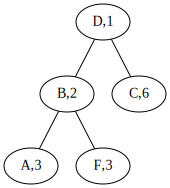

In [9]:
from graphviz import Graph  
global Elements, Heapsize
dot = Graph ()
for index in range (len (Elements)):       
    if left (index) < Heapsize:    
        start = Elements [index].Name + "," + str(Elements [index].Prio) # Concatinating the Name of each Element together with its Priority into a single string
        dest = Elements [left(index)].Name + "," + str(Elements [left(index)].Prio)
        dot.edge (start,dest)
    if right (index) < Heapsize:
        start = Elements [index].Name + "," + str(Elements [index].Prio)
        dest = Elements [right(index)].Name + "," + str(Elements [right(index)].Prio)
        dot.edge (start,dest)
dot